<img style="float: left; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="550" height="400" /> 
    

## <font color='navy'> Predicción de Fraudes en Microcréditos
    
#### <font color='black'> Sean Nicolás González Vázquez
    


### <font color="navy"><center> Parte 1. Fraude en Microcréditos <center><font color="navy">

> ### <font color="cornflowerblue"> Microcréditos <font color="cornflowerblue">

    
Los **microcréditos** son **pequeños préstamos financieros** que se otorgan principalmente a personas de bajos recursos pero prácticamente cualquier persona puede acceder a estos, ya que tienen la característica de **no necesitar de una gran información del prestatario para ser aprobados**, a diferencia de los bancos tradicionales.
    
Estos préstamos son generalmente de **montos reducidos**.
    
Es importante destacar que los microcréditos son diferentes de los préstamos tradicionales, ya que generalmente **no requieren garantías o avales formales**. En cambio, se basan en la confianza en la capacidad de los prestatarios para cumplir con los plazos de pago acordados.
    
    
Es por esto, que **individualmente un microcrédito es más riesgoso que un crédito tradicioal**.   
    
    
        Pero... ¿Qué pasa con el riesgo si juntas muchos micro créditos?
    
    
###    
> ### <font color="cornflowerblue"> Fraude <font color="cornflowerblue">
    
Debido a las características previamente comentadas de este tipo de préstamos, **existe una gran cantidad de personas que se dedican a falsificar documentos e información para obtener este tipo de préstamos** para no tener la necesidad de pagar, es decir, cometer fraude:
    
+ **Fraude:** Cualquier acto intencional y engañoso realizado con el propósito de obtener un beneficio personal o causar un perjuicio a otra persona o entidad. Implica el uso de engaños, falsificaciones, manipulaciones o aprovechamiento de la confianza de alguien para obtener dinero, bienes o servicios de manera ilícita.

El problema aquí es, la empresa de la cual son los datos que se tienen busca **identificar en base a los datos de las transacciones efectuadas por la tarjeta de crédito que usuarios son probablemente fraudes y cúales no** (a posteriori de la aprobación de la solicitud de crédito).

###     
> ### <font color="cornflowerblue"> ¿Por qué no nos importa la PD? <font color="cornflowerblue">
        
Para este caso, la empresa de la cual son los datos, vende la deuda empaquetada de los microcréditos a instituciones financieras para realizar **derivados financieros**, **debido a que los créditos están "*granularizados*" la probabilidad de default de múltiples micro-créditos disminuye en gran medida** comparada con la probabilidad de default de créditos altos con un mayor grado de colaterales. 
    
Una vez que se tienen los créditos "*buenos*" estos son empaquetados y vendidos a instituciones de crédito, los cuales los venden en instrumentos parecidos a los CDO's (los que causaron la crisis inmobiliaria en el 2008) pero NO iguales, estos son llamados CLO's (**Credit Loan Obligations**). 

### 
 
<img style="float: left; transform: translate(-50%, 0) margin: 30px 15px 15px 15px;" src="https://www.gfmi.com/wp-content/uploads/2016/04/collateralized-loans.png    
   " width="550" height="400" />
    

### 

### <font color="navy"><center> Parte 2. Resolución con Estadística <center><font color="navy">
    
Este problema planteado anteriormente, se puede resolver por medio de **regresión logística** debido a que este **es un modelo estadístico adecuado para variables de respuesta binaria**, es decir, eventos que pueden tener solo dos resultados posibles, **como el fraude (1) o no fraude (0)**. 
    
Además tiene otras ventajas para nuestro contexto como:
    
+ La regresión logística **permite estimar las probabilidades de ocurrencia del evento objetivo** (fraude), en función de las observaciones. Esto es importante para evaluar el riesgo y tomar decisiones basadas en las probabilidades estimadas.  
    

+ Además, la regresión logística es una técnica interpretable, y **nos proporciona coeficientes asociados a cada variable independiente, lo que permite comprender la influencia relativa de las variables** en la probabilidad de fraude. Esto puede ayudar a identificar las características o patrones que están relacionados con el fraude y a tomar medidas adecuadas para detectarlo o prevenirlo.

En resumen, **la regresión logística es una técnica estadística apropiada para resolver el problema que tenemos** debido a su capacidad para modelar la relación entre variables independientes y la probabilidad de fraude, estimar probabilidades y proporcionar interpretabilidad. 
    
Estas características la convierten en una buena herramienta en la detección y prevención del fraude.

### 

### <font color="navy"><center> Parte 3. Implementación <center><font color="navy">
    

In [1]:
from data import df
from functions import exploratory_data_analysis
from functions import logistic_class
from functions import diagnosis

### Visualización de Datos

In [2]:
df.head(4)

,hour,amount,gender,lat,long,city_pop,is_fraud
0,22,24.84,1,31.8599,-102.7413,23,1
1,22,780.52,0,42.5545,-90.3508,1306,1
2,22,620.33,0,42.5545,-90.3508,1306,1
3,22,1077.69,0,30.4590,-90.9027,71335,1


### Análisis Exploratorio de Datos

+ Tenemos 5,620 datos en total  


+ El promedio de los montos prestados es de 242.99 pesos con un valor mínimo de 1 peso y un máximo de 3,420 pesos  


+ Hay una mayor cantidad de observaciones de mujeres (1) que hombres (0) en los datos.
  
  
+ Hay una mayor cantidad de observaciones de no fraudes (0) que de fraudes (1)

In [3]:
EAD=exploratory_data_analysis(df)

EAD.describe()

,hour,amount,gender,lat,long,city_pop,is_fraud
count,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5.620000e+03,5620.000000
mean,13.246619,242.499931,0.553025,38.649241,-90.189362,8.867248e+04,0.381673
std,8.047003,344.972639,0.497225,5.090326,13.814275,3.058608e+05,0.485840
min,0.000000,1.010000,0.000000,20.027100,-165.672300,2.300000e+01,0.000000
25%,5.000000,17.597500,0.000000,34.668900,-96.727000,8.880000e+02,0.000000
50%,14.000000,67.735000,1.000000,39.371600,-87.591700,2.872000e+03,0.000000
75%,22.000000,308.562500,1.000000,42.072125,-80.175200,1.853425e+04,1.000000
max,23.000000,3204.980000,1.000000,65.689900,-67.950300,2.906700e+06,1.000000


In [4]:
EAD.rates(target_variable="is_fraud")

count of 0 cases: 3475
count 1 cases: 2145
is_fraud rate: 38.16725978647687 %


Del lado de la correlacion de Pearson:
    
+ Las variables continuas tienen poca correlación entre si, siendo la más alta amount con la hora (22%) 

Del lado de la correlación de Spearman:
  
+ El `amount` es la variable más correlacionada con el `fraude`con 56% seguido de la `hora` con 15%.


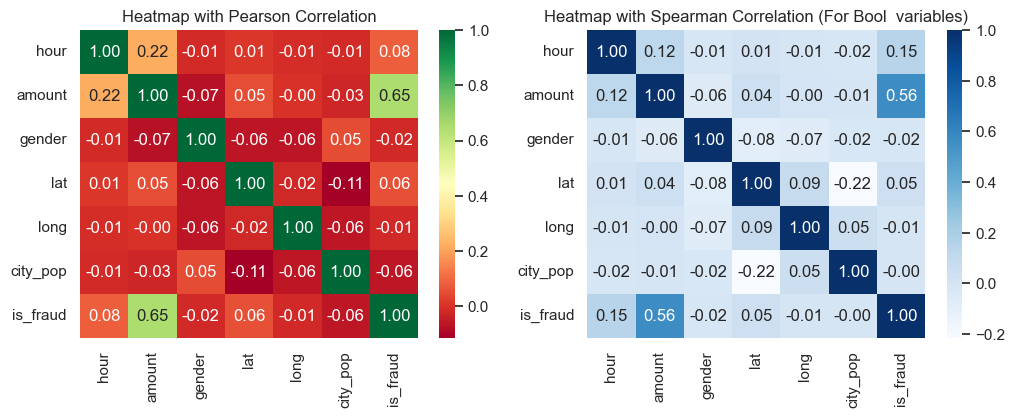

In [5]:
EAD.corr_heatmap()

Comparando boxplots de variables continuas con todos los datos:

+ `Amount` sesgado a valores pequeños (giro de la empresa son microcréditos)    


+ `lat` y `long` están de acuerdo a la latitud y longitud de México  


+ Hay ciudades con `población` grande y otras con población pequeña, con la media hacia poblaciones pequeñas

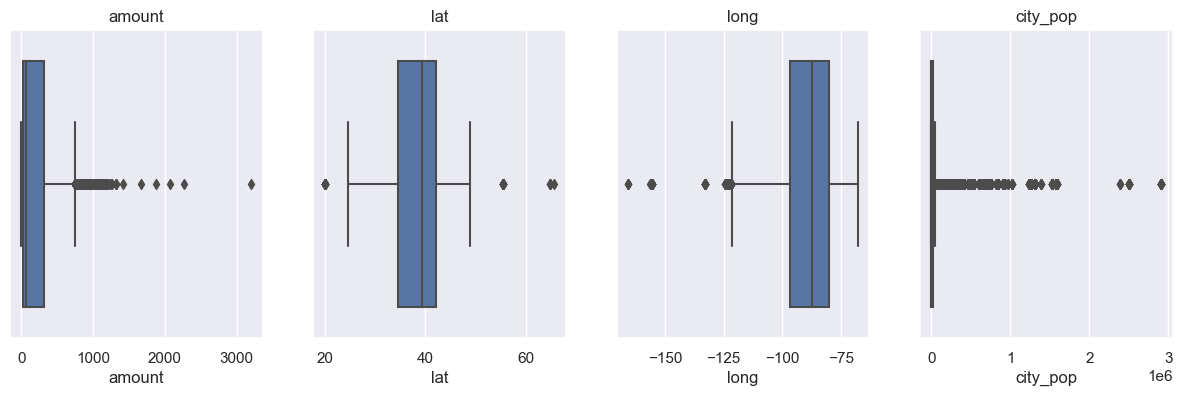

In [6]:
EAD.boxplots()

Comparando boxplots de variables continuas filtrando `is_fraud=1`:

+ Podemos notar que el rango de `amount` para casos de fraude es menor que para todos los datos.

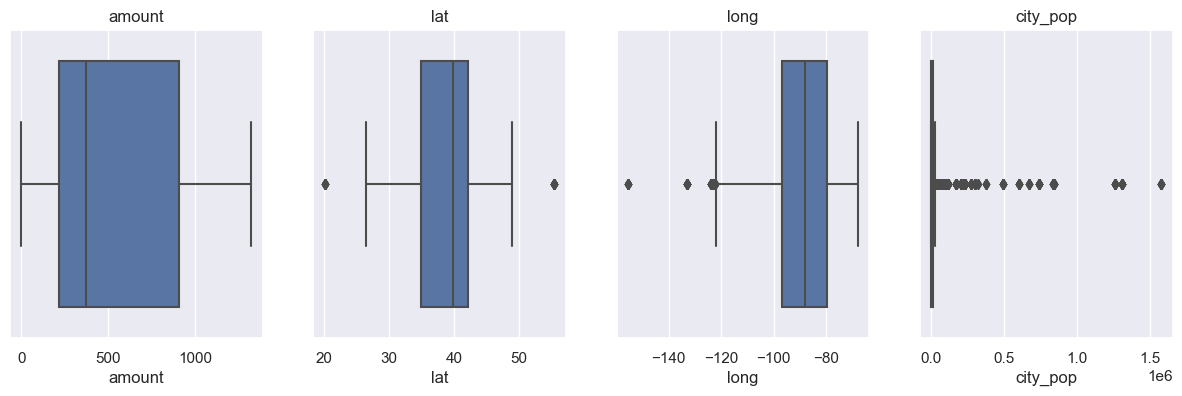

In [7]:
EAD.boxplots(target_variable="is_fraud")

Comparando el conteo de variables discretas con todos los datos y después con `is_fraud=1`:

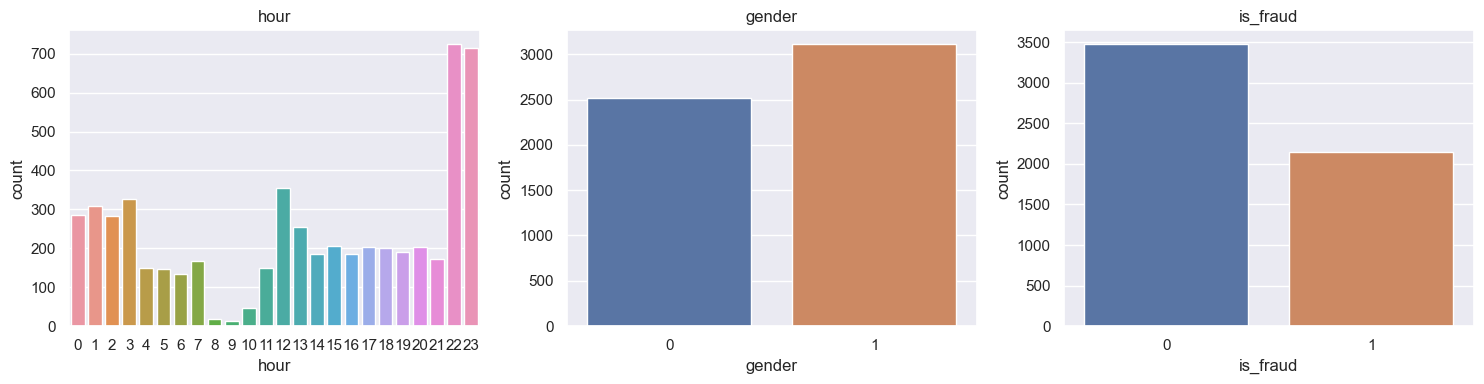

In [7]:
EAD.count_categorical()

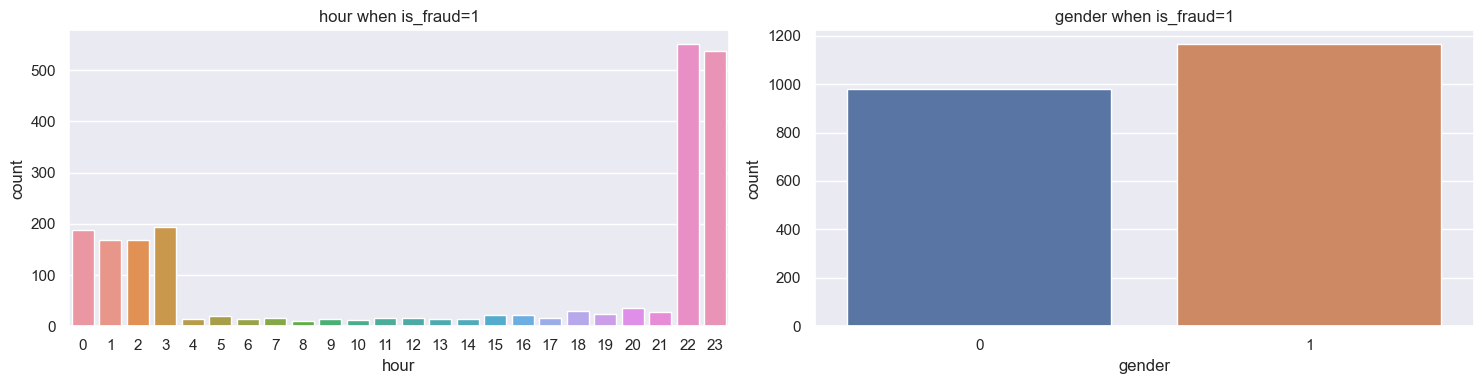

In [8]:
EAD.count_categorical(target_variable="is_fraud")

Podemos observar que la mayor cantidad de fraudes ocurren entre las 10:00 pm y las 3:00 am, es decir, entre la noche y la mañana

 ### Modelado

Al aplicar un modelo de regresión logistica sobre nuestros datos, encontramos que al menos para este modelo usando todas las variables, las variables de `lat` y `long` no son representativas, ya que el p value es grande, acepto la hipótesis nula:

Tenemos un Pseudo $R^2$ de 0.4 y un G de 1.01, lo cual nos dice que nuestro modelo no es tan bueno pero es mejor que un modelo nulo.

In [9]:
lm = logistic_class(df)
lm.log_model(target_variable="is_fraud")

Optimization terminated successfully.
         Current function value: 0.400003
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:                 5620
Model:                          Logit   Df Residuals:                     5613
Method:                           MLE   Df Model:                            6
Date:                Thu, 06 Jul 2023   Pseudo R-squ.:                  0.3984
Time:                        22:29:03   Log-Likelihood:                -2248.0
converged:                       True   LL-Null:                       -3736.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hour          -0.0149      0.005     -3.115      0.002      -0.024      -0.006
amount         0.0076      0.

Continuando por método `backward`, eliminaremos las dos variables no significativas comentadas anteriormente.

Al hacerlo, encontramos que todas las variables son significativas, con el `LLR p-value` de prácticamente, podemos concluir que nuestro modelo es mejor que un modelo nulo, es decir, hay modelo, el $R^2$ es de 0.3977, por lo cual se podría decir que esta en el límite. Utilizaremos este modelo para ver como se ajustan nuestras predicciones a los datos reales.


In [10]:
model, y_hat, probas, y_true = lm.log_model(target_variable="is_fraud", 
                                            ignore_variables=["lat", "long"], 
                                            return_model=True)

Optimization terminated successfully.
         Current function value: 0.400466
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:                 5620
Model:                          Logit   Df Residuals:                     5615
Method:                           MLE   Df Model:                            4
Date:                Thu, 06 Jul 2023   Pseudo R-squ.:                  0.3977
Time:                        22:29:03   Log-Likelihood:                -2250.6
converged:                       True   LL-Null:                       -3736.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hour          -0.0150      0.005     -3.142      0.002      -0.024      -0.006
amount         0.0076      0.

 ### Diágnostico 

Aquí, encontramos la matriz de contingencia, la cual nos dice que hubo 96 falsos negativos y 591 falsos negativos, en nuestro modelo, con un `f1-score` (la media harmónica entre el precision y recall, es decir que tan bien clasifica nuestro modelo los TP) de 0.88.

Este 0.88 es aceptable, al menos para modelos de clasificación financiera, debido a la complejidad de este tipo de problemas, pero observamos que nuestro modelo clasifica de mucha mejor manera los 0's que los 1's.

In [11]:
lm.contingency_table()

Contingency Matrix
[[3379   96]
 [ 591 1554]]


In [12]:
lm.report()

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      3475
           1       0.94      0.72      0.82      2145

    accuracy                           0.88      5620
   macro avg       0.90      0.85      0.86      5620
weighted avg       0.89      0.88      0.87      5620



 #### Análisis de Residuos y de Probabilidades Estimadas

En el análisis de residuso, podemos observar que nuestro modelo tiene gran cantidad de sesgo, y el modelo no esta tan "seguro" de las probabilidades asignadas a cada observación.

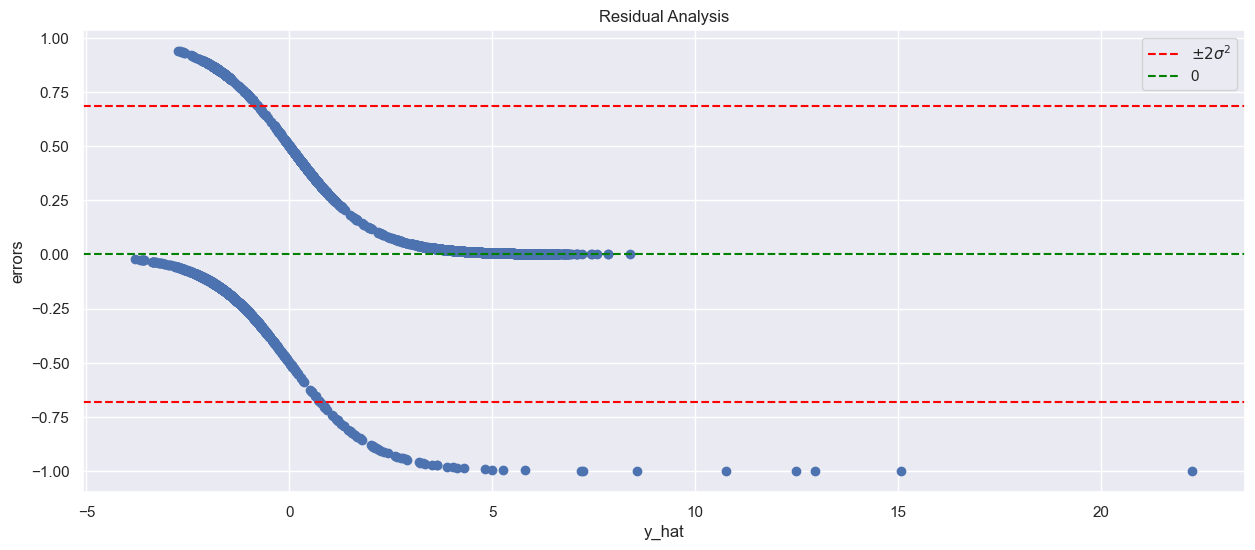

In [16]:
d=diagnosis(data=df, model=model,y=y_true,probas=probas)

d.residual_analysis()

Ahora, si graficamos la función de densidad de distribución para cada grupo (fraude o no fraude), nos encontramos con un problema, ya que no se puede distinguir de manera correcta una distribución para los casos de fraude, es por esto que nuestro modelo clasifica de mejor manera los 0 que los 1.

Esto es un problema, ya que nuestro principal objetivo es buscar ajustar una distribución a cada sub-grupo, para poder diferenciar entre las dos poblaciones.

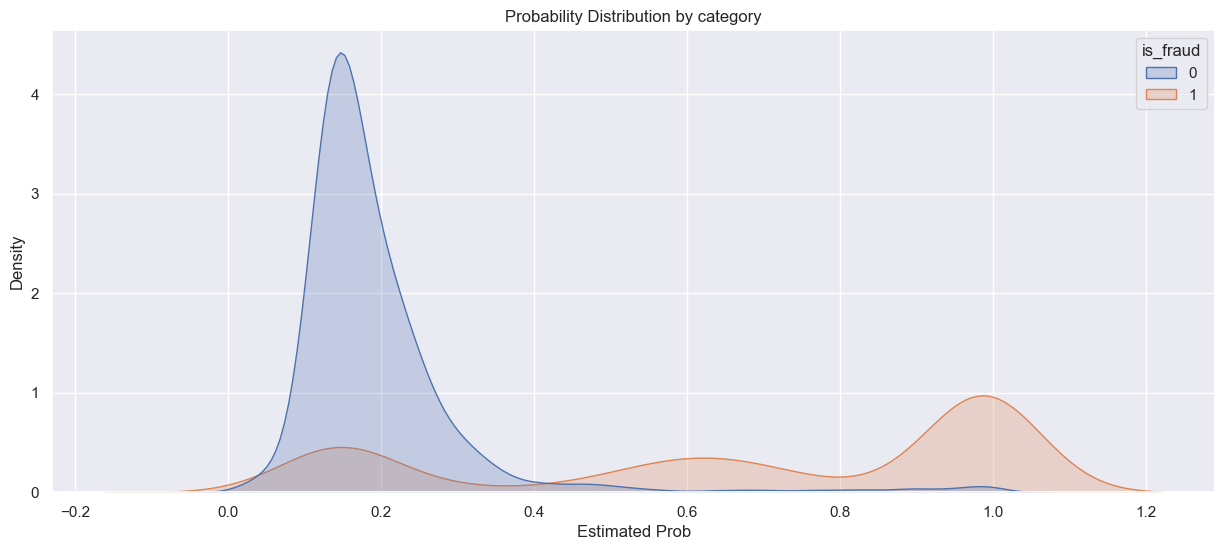

In [17]:
d.distribution_prob(target_variable="is_fraud")

### 

### <font color="navy"><center> Parte 4. Conclusiones <center><font color="navy">
   

Se puede concluir que a pesar de que se tienen unas buenas métricas de `f1-score` y que (al menos estadísticamente) nuestras variables son significativas dada la prueba de `z`, **el modelo no es bueno**, ya que **no es capaz de distinguir de manera correcta entre los casos de fraude y no fraude**, y no ajusta una función de distribución de probabilidad concreta a los casos de fraude. 

Esto se puede deber a una muestra de la **población no homógenea**, que dadas las características de los **microcréditos** (**prácticamente se les dan a cualquiera**) suena coherentes.

De esto se puede inferir que **las variables utilizadas** para modelar el fraude, al menos para nuestro conjunto de datos, **no explica de manera correcta el fenómeno**, por lo cual se tendrían que buscar otras variables para modelarlo. 

También, dado que las variables son muy genéricas en un crédito (amount, genéro, hora y población), es decir, prácticamente es la información mínima que se tiene de una persona que realiza una transacción financiera es posible que esta conclusión este en lo correcto, por lo cual se deberían de obtener variables que puedan ayudar a diferenciar mejor entre un caso de fraude o no.

Finalmente, **se recomiendan dos cosas**:

+ Tratar de realizar la clasificación de `fraude` o `no fraude` antes de dar la línea de crédito a un cliente, que es cuando se tiene o puede obtenerse una mayor cantidad de información del mismo, como por ejemplo actividad en redes sociales, IPN, etc. Se podría realizar este modelo con las observaciones previas que se tienen y en función de estas buscar clasificar nuevas observaciones con una mayor cantidad de información.


+ Realizar un análisis financiero del giro de la empresa para buscar observar si realmente el negocio es `dar microcréditos` (ganar por la tasa cobrada a nuestros clientes) o vender estos a instituciones financieras para realizar `derivados`, ya que, en el caso que la mayor cantidad de ingresos vengan del segundo rubro o que las ganancias por las ventas de los créditos sean mayores a las pérdidas por fraude, no tiene sentido tratar de predecir un fraude o no, ya que estaríamos cubiertos por los ingresos del segundo giro.